In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cube import Cube

In [3]:
%matplotlib widget

In [4]:
c = Cube({'top': 'yellow',
          'front': 'blue',
          'right': 'green',
          'back': 'cyan',
          'left': 'orange',
          'bottom': 'red'})

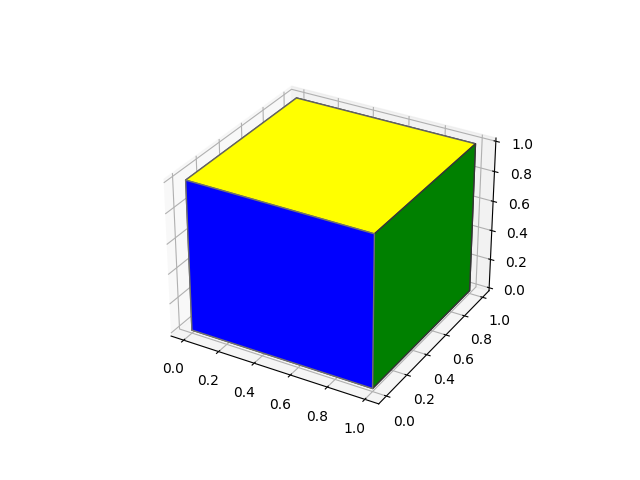

In [5]:
c.plot()

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from matplotlib.gridspec import GridSpec
import itertools

In [7]:
init_helper = lambda colors: {side: color for side, color in zip(['top', 'front', 'right', 'back', 'left', 'bottom'], colors)}

YELLOW = 'yellow'
RED = 'red'
GREEN = 'green'
BLUE = 'blue'

class InstantInsanity:
    def __init__(self):
        self._cubes = [
            Cube(init_helper([YELLOW, RED, RED, GREEN, RED, BLUE])),
            Cube(init_helper([YELLOW, GREEN, BLUE, GREEN, RED, BLUE])),
            Cube(init_helper([BLUE, GREEN, RED, YELLOW, YELLOW, RED])),
            Cube(init_helper([YELLOW, BLUE, GREEN, YELLOW, RED, GREEN])),
        ]
        
    def is_solution(self):
        for check in ['front', 'right', 'back', 'left']:
            s = set(c.color_of(check) for c in self._cubes)
            if len(s) < 4:
                return False
        return True
    
    def plot(self):
        fig = plt.figure(constrained_layout=True)
        gs = GridSpec(4, 1, figure=fig)

        ax1 = fig.add_subplot(gs[0, 0], projection='3d')
        ax2 = fig.add_subplot(gs[1, 0], projection='3d')
        ax3 = fig.add_subplot(gs[2, 0], projection='3d')
        ax4 = fig.add_subplot(gs[3, 0], projection='3d')
        
        assert len(self._cubes) == 4
        for ax, cube in zip([ax4, ax3, ax2, ax1], self._cubes):
            cube.plot(ax)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
            
    def swap(self, i, j):
        assert i != j
        assert 0 <= i <= len(self._cubes)
        assert 0 <= j <= len(self._cubes)
        self._cubes[i], self._cubes[j] = self._cubes[j], self._cubes[i]

In [8]:
ii = InstantInsanity()

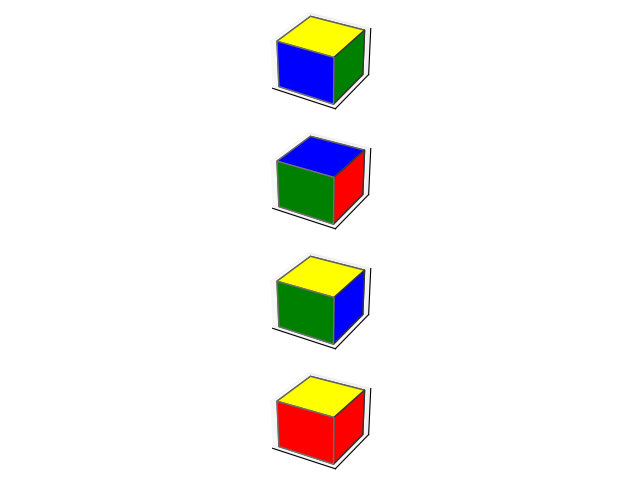

In [9]:
ii.plot()

In [10]:
ii.is_solution()

False

In [11]:
ii.swap(0,1)

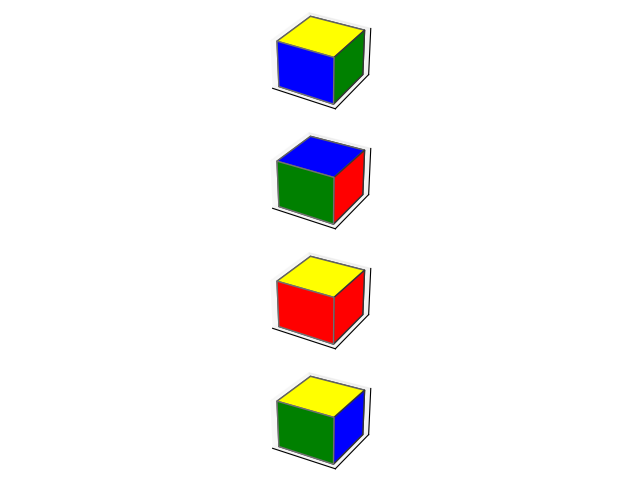

In [12]:
ii.plot()

In [13]:
ii.is_solution()

False

In [14]:
ii._cubes[0].change_orientation(0,1,0)

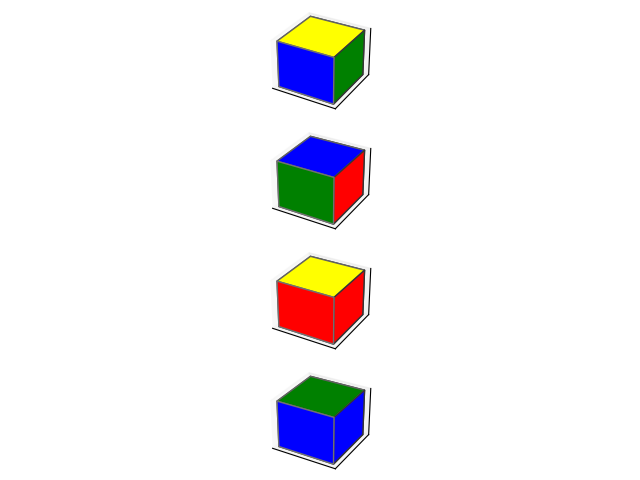

In [15]:
ii.plot()

In [16]:
ii.is_solution()

False

In [17]:
# brute force